# AU Domestic Airline Traffic Analysis

dataset contains data of domestic flights in AU
passenger_load_factor=total revenue passenger kilometres performed as a percentage of the total available seat km
RPKs= Revenue passenger kilometer. Paasenger_trip * distance
ASKs=Available seat km. seats*distance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

In [3]:
#recognize special characters(missing values) as NAN
missing_values = ["n/a", "na", "--","?"]
airtraffic=pd.read_csv('C://Users/monic/Desktop/data science -insitute of dat/DATA/airlinetraffic.csv',na_values=missing_values)

## Explore Data - EDA

In [4]:
#head
airtraffic.head()

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num
0,ADELAIDE,ALICE SPRINGS,1/01/1984,15743,143,81.8,1316,20717788,25327369,19246,1984,1
1,ADELAIDE,BRISBANE,1/01/1984,3781,32,89.8,1622,6132782,6829379,4210,1984,1
2,ADELAIDE,CANBERRA,1/01/1984,1339,12,94.7,972,1301508,1374348,1414,1984,1
3,ADELAIDE,DARWIN,1/01/1984,3050,33,66.8,2619,7987950,11958009,4566,1984,1
4,ADELAIDE,GOLD COAST,1/01/1984,1596,16,88.5,1607,2564772,2898047,1803,1984,1


In [5]:
#Shape
airtraffic.shape

(23808, 12)

In [6]:
airtraffic.dtypes

City1                     object
City2                     object
Month                     object
Passenger_Trips            int64
Aircraft_Trips             int64
Passenger_Load_Factor    float64
Distance_GC_(km)           int64
RPKs                       int64
ASKs                       int64
Seats                      int64
Year                       int64
Month_num                  int64
dtype: object

In [7]:
#creat a new column date as a datetime from month(store the date)
airtraffic['date'] = pd.to_datetime(airtraffic['Month'],format ='%d/%m/%Y').dt.normalize()
#airtraffic['Year'] = pd.to_datetime(airtraffic['Year'])
import math
airtraffic['Year']=np.trunc(airtraffic['Year'].astype(int))

In [8]:
#Data Types
airtraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23808 entries, 0 to 23807
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   City1                  23808 non-null  object        
 1   City2                  23808 non-null  object        
 2   Month                  23808 non-null  object        
 3   Passenger_Trips        23808 non-null  int64         
 4   Aircraft_Trips         23808 non-null  int64         
 5   Passenger_Load_Factor  23808 non-null  float64       
 6   Distance_GC_(km)       23808 non-null  int64         
 7   RPKs                   23808 non-null  int64         
 8   ASKs                   23808 non-null  int64         
 9   Seats                  23808 non-null  int64         
 10  Year                   23808 non-null  float64       
 11  Month_num              23808 non-null  int64         
 12  date                   23808 non-null  datetime64[ns]
dtypes

In [9]:
airtraffic.describe().T

,count,mean,std,min,25%,50%,75%,max
Passenger_Trips,23808.0,4.844173e+04,8.502922e+04,0.0,9067.50,17847.0,52831.00,834347.0
Aircraft_Trips,23808.0,4.746710e+02,6.055207e+02,0.0,128.00,316.0,556.00,5397.0
Passenger_Load_Factor,23808.0,6.988217e+01,1.840076e+01,0.0,65.20,73.8,80.60,109.7
Distance_GC_(km),23808.0,1.215534e+03,8.456545e+02,0.0,538.00,956.0,1622.00,3615.0
RPKs,23808.0,5.458888e+07,9.019162e+07,0.0,5329457.00,18431455.0,56821915.75,591587042.0
ASKs,23808.0,6.990965e+07,1.116101e+08,0.0,7603079.75,25850305.5,73805849.00,705952104.0
Seats,23808.0,6.312546e+04,1.062746e+05,0.0,13312.00,25402.0,70417.00,959123.0
Year,23808.0,2.003322e+03,1.040448e+01,1984.0,1995.00,2004.0,2012.00,2020.0
Month_num,23808.0,6.479503e+00,3.460656e+00,1.0,3.00,6.0,9.00,12.0


In [10]:
airtraffic.loc[airtraffic['Seats']==0]

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,date
56,BRISBANE,MACKAY,1/02/1984,0,1,0.0,797,0,0,0,1984.0,2,1984-02-01
565,BRISBANE,MACKAY,1/02/1985,0,9,0.0,797,0,0,0,1985.0,2,1985-02-01
877,CAIRNS,MELBOURNE,1/09/1985,0,1,0.0,2311,0,0,0,1985.0,9,1985-09-01
1153,MELBOURNE,NEWCASTLE,1/03/1986,0,1,0.0,836,0,0,0,1986.0,3,1986-03-01
1638,MELBOURNE,NEWCASTLE,1/02/1987,0,1,0.0,836,0,0,0,1987.0,2,1987-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23164,MELBOURNE,TOWNSVILLE,1/03/2020,0,0,0.0,2055,0,0,0,2020.0,3,2020-03-01
23441,PROSERPINE,SYDNEY,1/08/2017,0,0,0.0,0,0,0,0,2017.0,8,2017-08-01
23471,PROSERPINE,SYDNEY,1/02/2020,0,0,0.0,1517,0,0,0,2020.0,2,2020-02-01
23472,PROSERPINE,SYDNEY,1/03/2020,0,0,0.0,1517,0,0,0,2020.0,3,2020-03-01


In [11]:
#Check for Nulls
pd.isnull(airtraffic).sum()

City1                    0
City2                    0
Month                    0
Passenger_Trips          0
Aircraft_Trips           0
Passenger_Load_Factor    0
Distance_GC_(km)         0
RPKs                     0
ASKs                     0
Seats                    0
Year                     0
Month_num                0
date                     0
dtype: int64

In [12]:
#get the day of week from the date column
import datetime
import calendar
dayofweek= airtraffic['date'].dt.day_name()
airtraffic['dayofweek']=dayofweek
airtraffic.tail(100)

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,date,dayofweek
23708,SYDNEY,TOWNSVILLE,1/09/2017,15487,108,81.6,1690,26173030,32055920,18968,2017.0,9,2017-09-01,Friday
23709,SYDNEY,TOWNSVILLE,1/10/2017,15620,116,76.4,1690,26397800,34543600,20440,2017.0,10,2017-10-01,Sunday
23710,SYDNEY,TOWNSVILLE,1/11/2017,12042,90,77.3,1690,20350980,26318370,15573,2017.0,11,2017-11-01,Wednesday
23711,SYDNEY,TOWNSVILLE,1/12/2017,16463,112,83.8,1690,27822470,33211880,19652,2017.0,12,2017-12-01,Friday
23712,SYDNEY,TOWNSVILLE,1/01/2018,14022,107,79.7,1690,23697180,29718650,17585,2018.0,1,2018-01-01,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23803,SYDNEY,WAGGA WAGGA,1/11/2019,16171,468,69.2,367,5934757,8574588,23364,2019.0,11,2019-11-01,Friday
23804,SYDNEY,WAGGA WAGGA,1/12/2019,14009,392,69.8,367,5141303,7362387,20061,2019.0,12,2019-12-01,Sunday
23805,SYDNEY,WAGGA WAGGA,1/01/2020,11189,290,70.5,367,4106363,5828327,15881,2020.0,1,2020-01-01,Wednesday
23806,SYDNEY,WAGGA WAGGA,1/02/2020,13634,427,64.5,367,5003678,7761316,21148,2020.0,2,2020-02-01,Saturday


In [13]:
#Check what are the dais of the week with the busiest flow of passengers
airtraffic.groupby('dayofweek')['Passenger_Trips'].sum().sort_values(ascending=False)

dayofweek
Sunday       171967369
Friday       166532434
Thursday     164277986
Tuesday      164191943
Wednesday    162858862
Saturday     162725318
Monday       160746701
Name: Passenger_Trips, dtype: int64

In [14]:
airtraffic.groupby('Year')['Passenger_Trips'].sum()

Year
1984.0     9265132
1985.0     9985232
1986.0    10634281
1987.0    11422910
1988.0    12778587
1989.0     9679805
1990.0    12196059
1991.0    15984908
1992.0    16751770
1993.0    18689073
1994.0    21665355
1995.0    23558920
1996.0    24701444
1997.0    24840995
1998.0    24983881
1999.0    25826954
2000.0    27919718
2001.0    28585735
2002.0    27182777
2003.0    29934819
2004.0    34199922
2005.0    36121467
2006.0    37990758
2007.0    40049096
2008.0    43063354
2009.0    43946408
2010.0    47310316
2011.0    47228232
2012.0    49897427
2013.0    51527961
2014.0    51950453
2015.0    52396708
2016.0    53913538
2017.0    54629078
2018.0    55486043
2019.0    55630414
2020.0    11371083
Name: Passenger_Trips, dtype: int64

In [15]:
categorydate=pd.cut((airtraffic['Year']),bins=[1983,2000,2010,np.inf])
groupcategorydate=airtraffic.groupby(categorydate)['RPKs'].sum()
groupcategorydate

Year
(1983.0, 2000.0]    310087070434
(2000.0, 2010.0]    417618777580
(2010.0, inf]       571946152757
Name: RPKs, dtype: int64

In [16]:
# create a column for origen-destination concatinating city1 and city2. 
airtraffic['orig_dest']=airtraffic.City1+ "-"+airtraffic.City2
airtraffic['orig_dest'].value_counts()

KALGOORLIE-PERTH        435
CANBERRA-MELBOURNE      435
BROOME-PERTH            435
BRISBANE-MELBOURNE      435
MELBOURNE-MILDURA       435
                       ... 
NEWCASTLE-GOLD COAST     74
ARMIDALE-SYDNEY          72
SYDNEY-TAMWORTH          59
MELBOURNE-TOWNSVILLE     32
PROSERPINE-SYDNEY        32
Name: orig_dest, Length: 75, dtype: int64

In [17]:
#Top 10 Origin Destination. As there are many routes i'll focus on the top 5 
top10 = airtraffic.groupby(['orig_dest'])['Aircraft_Trips'].sum().sort_values(ascending=False).head()
top2=top10.to_frame(name='sum').reset_index()
top2

,orig_dest,sum
0,MELBOURNE-SYDNEY,1422318
1,BRISBANE-SYDNEY,938471
2,CANBERRA-SYDNEY,614769
3,BRISBANE-MELBOURNE,596870
4,ADELAIDE-MELBOURNE,513730


In [18]:
#create a new dataframe with just the top 5 Orig_dest cities
tes = airtraffic.loc[airtraffic['orig_dest'].isin(['MELBOURNE-SYDNEY','BRISBANE-SYDNEY','CANBERRA-SYDNEY','BRISBANE-MELBOURNE','ADELAIDE-MELBOURNE']),['Aircraft_Trips','orig_dest','date','dayofweek','Passenger_Trips','Seats']]
tes

,Aircraft_Trips,orig_dest,date,dayofweek,Passenger_Trips,Seats
5,711,ADELAIDE-MELBOURNE,1984-01-01,Sunday,50817,76647
15,324,BRISBANE-MELBOURNE,1984-01-01,Sunday,31791,37667
19,990,BRISBANE-SYDNEY,1984-01-01,Sunday,95027,128938
23,562,CANBERRA-SYDNEY,1984-01-01,Sunday,32529,57676
38,1368,MELBOURNE-SYDNEY,1984-01-01,Sunday,132682,199522
...,...,...,...,...,...,...
23128,5005,MELBOURNE-SYDNEY,2019-11-01,Friday,800100,894358
23129,4857,MELBOURNE-SYDNEY,2019-12-01,Sunday,756723,860602
23130,4869,MELBOURNE-SYDNEY,2020-01-01,Wednesday,742835,863423
23131,4677,MELBOURNE-SYDNEY,2020-02-01,Saturday,691944,827819


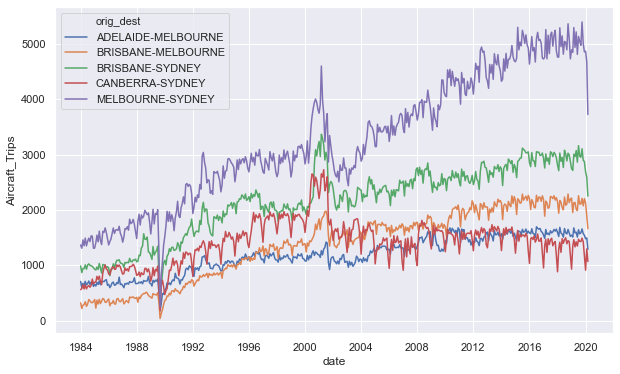

In [19]:
sns.lineplot(x='date',y='Aircraft_Trips', hue='orig_dest', data=tes)

melb-syd has ben the busiest route throughout the years. last 5 years canberra sydney has shwon a decrease in trips, going below than adel-melb.

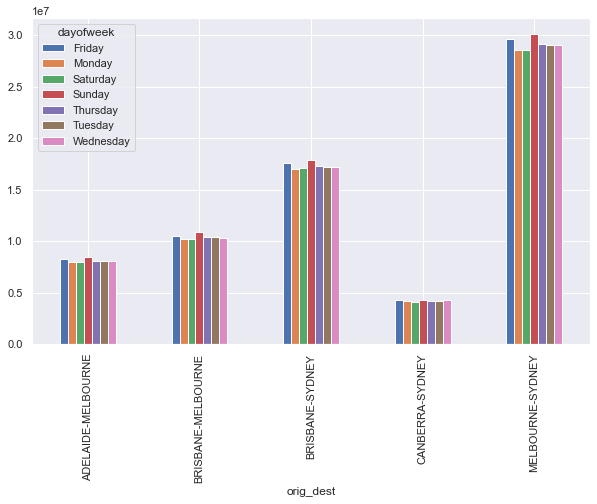

In [20]:
#Busiest days by journey
odtop = tes.groupby(['orig_dest','dayofweek'])['Passenger_Trips'].sum().sort_values(ascending=False)
odtop
visual = odtop.unstack(level=1)
visual.plot(kind='bar')

Busiest day for the routes is Sunday

In [21]:
#Set date as index for timeseries analysis
airtraffic.set_index('date',inplace = True)

In [22]:
airtraffic.tail()

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,dayofweek,orig_dest
date,,,,,,,,,,,,,,
2019-11-01,SYDNEY,WAGGA WAGGA,1/11/2019,16171,468,69.2,367,5934757,8574588,23364,2019.0,11,Friday,SYDNEY-WAGGA WAGGA
2019-12-01,SYDNEY,WAGGA WAGGA,1/12/2019,14009,392,69.8,367,5141303,7362387,20061,2019.0,12,Sunday,SYDNEY-WAGGA WAGGA
2020-01-01,SYDNEY,WAGGA WAGGA,1/01/2020,11189,290,70.5,367,4106363,5828327,15881,2020.0,1,Wednesday,SYDNEY-WAGGA WAGGA
2020-02-01,SYDNEY,WAGGA WAGGA,1/02/2020,13634,427,64.5,367,5003678,7761316,21148,2020.0,2,Saturday,SYDNEY-WAGGA WAGGA
2020-03-01,SYDNEY,WAGGA WAGGA,1/03/2020,9344,385,49.5,367,3429248,6925657,18871,2020.0,3,Sunday,SYDNEY-WAGGA WAGGA


Text(0, 0.5, 'Passenger Trips')

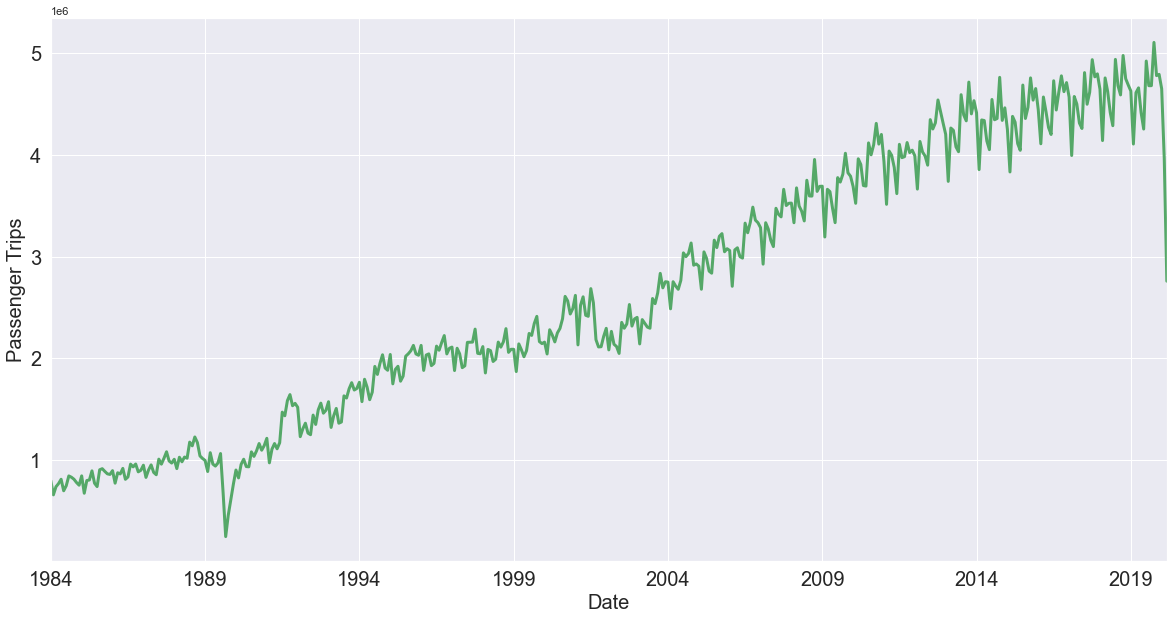

In [23]:
#Analyse passenger trips by setting date as index - timeseries
ts=airtraffic.groupby(airtraffic.index)['Passenger_Trips'].sum()
ts.plot(figsize=(20,10), linewidth=3, fontsize=20, c='g')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Passenger Trips',fontsize=20)

over the years we can see an upward trend, this year there is not enough data but it looks like that trips has started to fall

Text(0, 0.5, 'Passenger Trips')

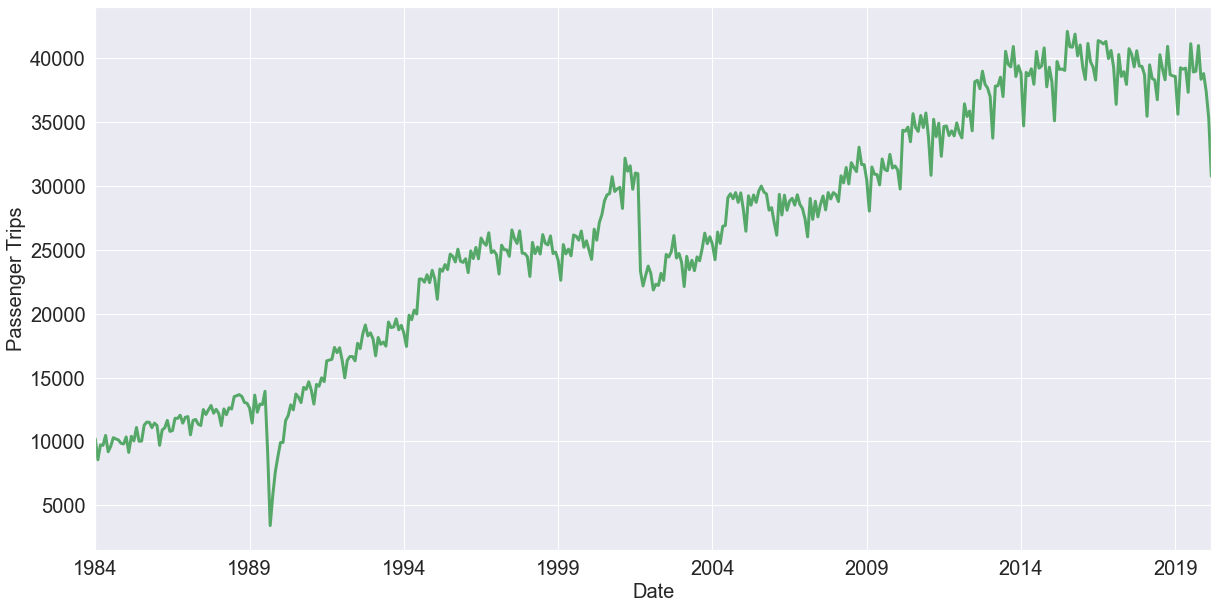

In [24]:
#Analyse Aircraft trips by year
ts2=airtraffic.groupby(airtraffic.index)['Aircraft_Trips'].sum()
ts2.plot(figsize=(20,10), linewidth=3, fontsize=20, c='g')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Passenger Trips',fontsize=20)

In [25]:
#create a column for month name to analize Passenger trips pwer month
month= airtraffic['Month_num'].apply(lambda x: calendar.month_abbr[x])
airtraffic['month_name']=month
airtraffic['month_name']

date
1984-01-01    Jan
1984-01-01    Jan
1984-01-01    Jan
1984-01-01    Jan
1984-01-01    Jan
             ... 
2019-11-01    Nov
2019-12-01    Dec
2020-01-01    Jan
2020-02-01    Feb
2020-03-01    Mar
Name: month_name, Length: 23808, dtype: object

In [43]:
# mean of passenger trips
mean_passanger =airtraffic['Passenger_Trips'].mean()
print('Mean passenger trips:', mean_passanger)

Mean passenger trips: 48441.72601646505


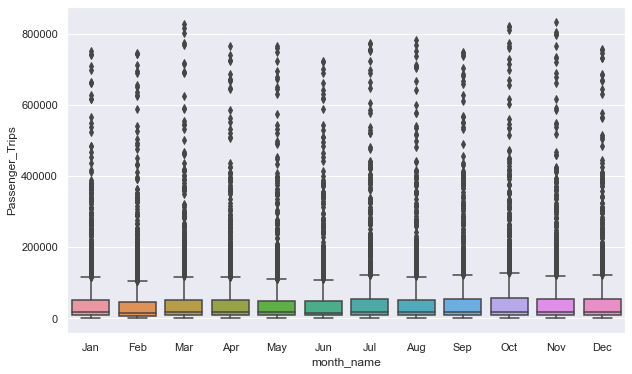

In [41]:
#to show the distribution of passenger per month
sns.boxplot(y='Passenger_Trips', x ='month_name', data=airtraffic)
plt.show()

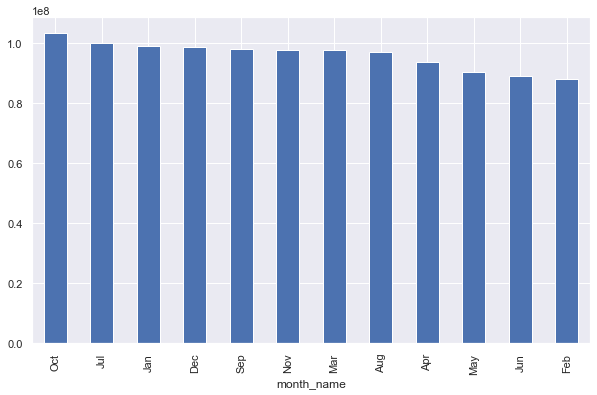

In [26]:
#Check the month with the highest amount of passenger trips.
monthgroup=airtraffic.groupby(['month_name'])['Passenger_Trips'].sum().sort_values(ascending=False)
monthgroup.plot(kind='bar')

According to the graph the busiest month is October.

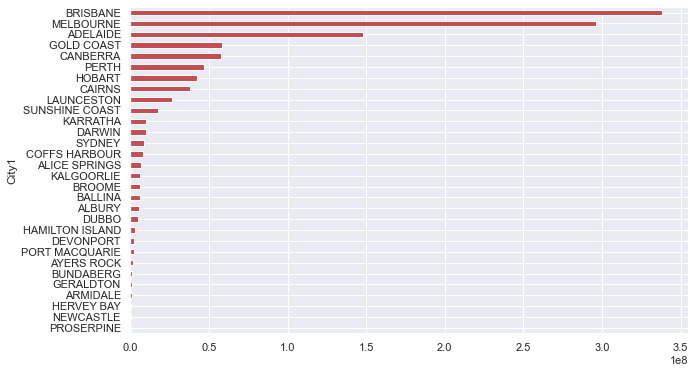

In [32]:
#cities that have more flights departing (origin destination)
City1sum=airtraffic.groupby(['City1'])['Passenger_Trips'].sum().sort_values(ascending=True)
City1sum.plot(kind='barh',color = 'r')

Brisbane and Melbourne are the cities which have the most flights departing

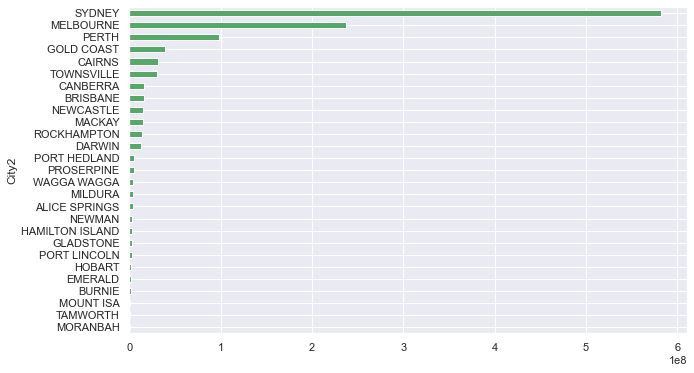

In [35]:
#cities that have more flights arriving (destination)
City2sum=airtraffic.groupby(['City2'])['Passenger_Trips'].sum().sort_values(ascending=True)
City2sum.plot(kind='barh',color = 'g')

Sydney and Melbourne are the cities which have the most flights arriving

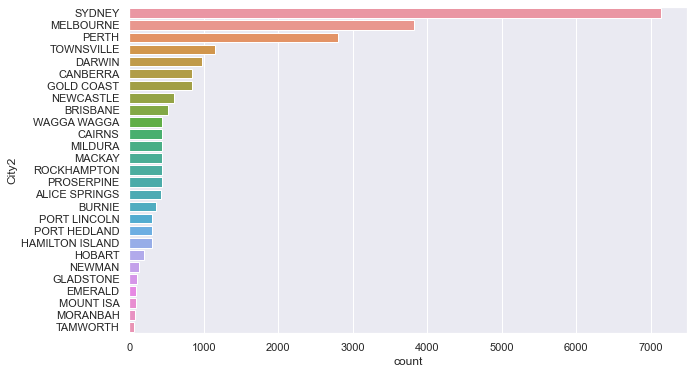

In [34]:
##cities that have more flights arriving (origin destination) - Sydney has the most traffic arriving
ax=sns.countplot(y='City2',data=airtraffic,order=airtraffic['City2'].value_counts().index)

## Correlations

In [121]:
airtraffic.corr()

,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num
Passenger_Trips,1.000000,0.949018,0.238714,-0.059809,0.807887,0.810168,0.996135,0.183918,0.016043
Aircraft_Trips,0.949018,1.000000,0.204636,-0.229647,0.696784,0.706344,0.959286,0.156258,0.014008
Passenger_Load_Factor,0.238714,0.204636,1.000000,0.133116,0.294134,0.279249,0.221349,-0.069867,0.055226
Distance_GC_(km),-0.059809,-0.229647,0.133116,1.000000,0.310780,0.307151,-0.075995,-0.013200,0.003287
RPKs,0.807887,0.696784,0.294134,0.310780,1.000000,0.996476,0.795949,0.226120,0.019000
ASKs,0.810168,0.706344,0.279249,0.307151,0.996476,1.000000,0.804380,0.222021,0.012622
Seats,0.996135,0.959286,0.221349,-0.075995,0.795949,0.804380,1.000000,0.176936,0.010924
Year,0.183918,0.156258,-0.069867,-0.013200,0.226120,0.222021,0.176936,1.000000,-0.019436
Month_num,0.016043,0.014008,0.055226,0.003287,0.019000,0.012622,0.010924,-0.019436,1.000000


In [142]:
airtraffic['Month_num']=airtraffic['Month_num'].astype(int)

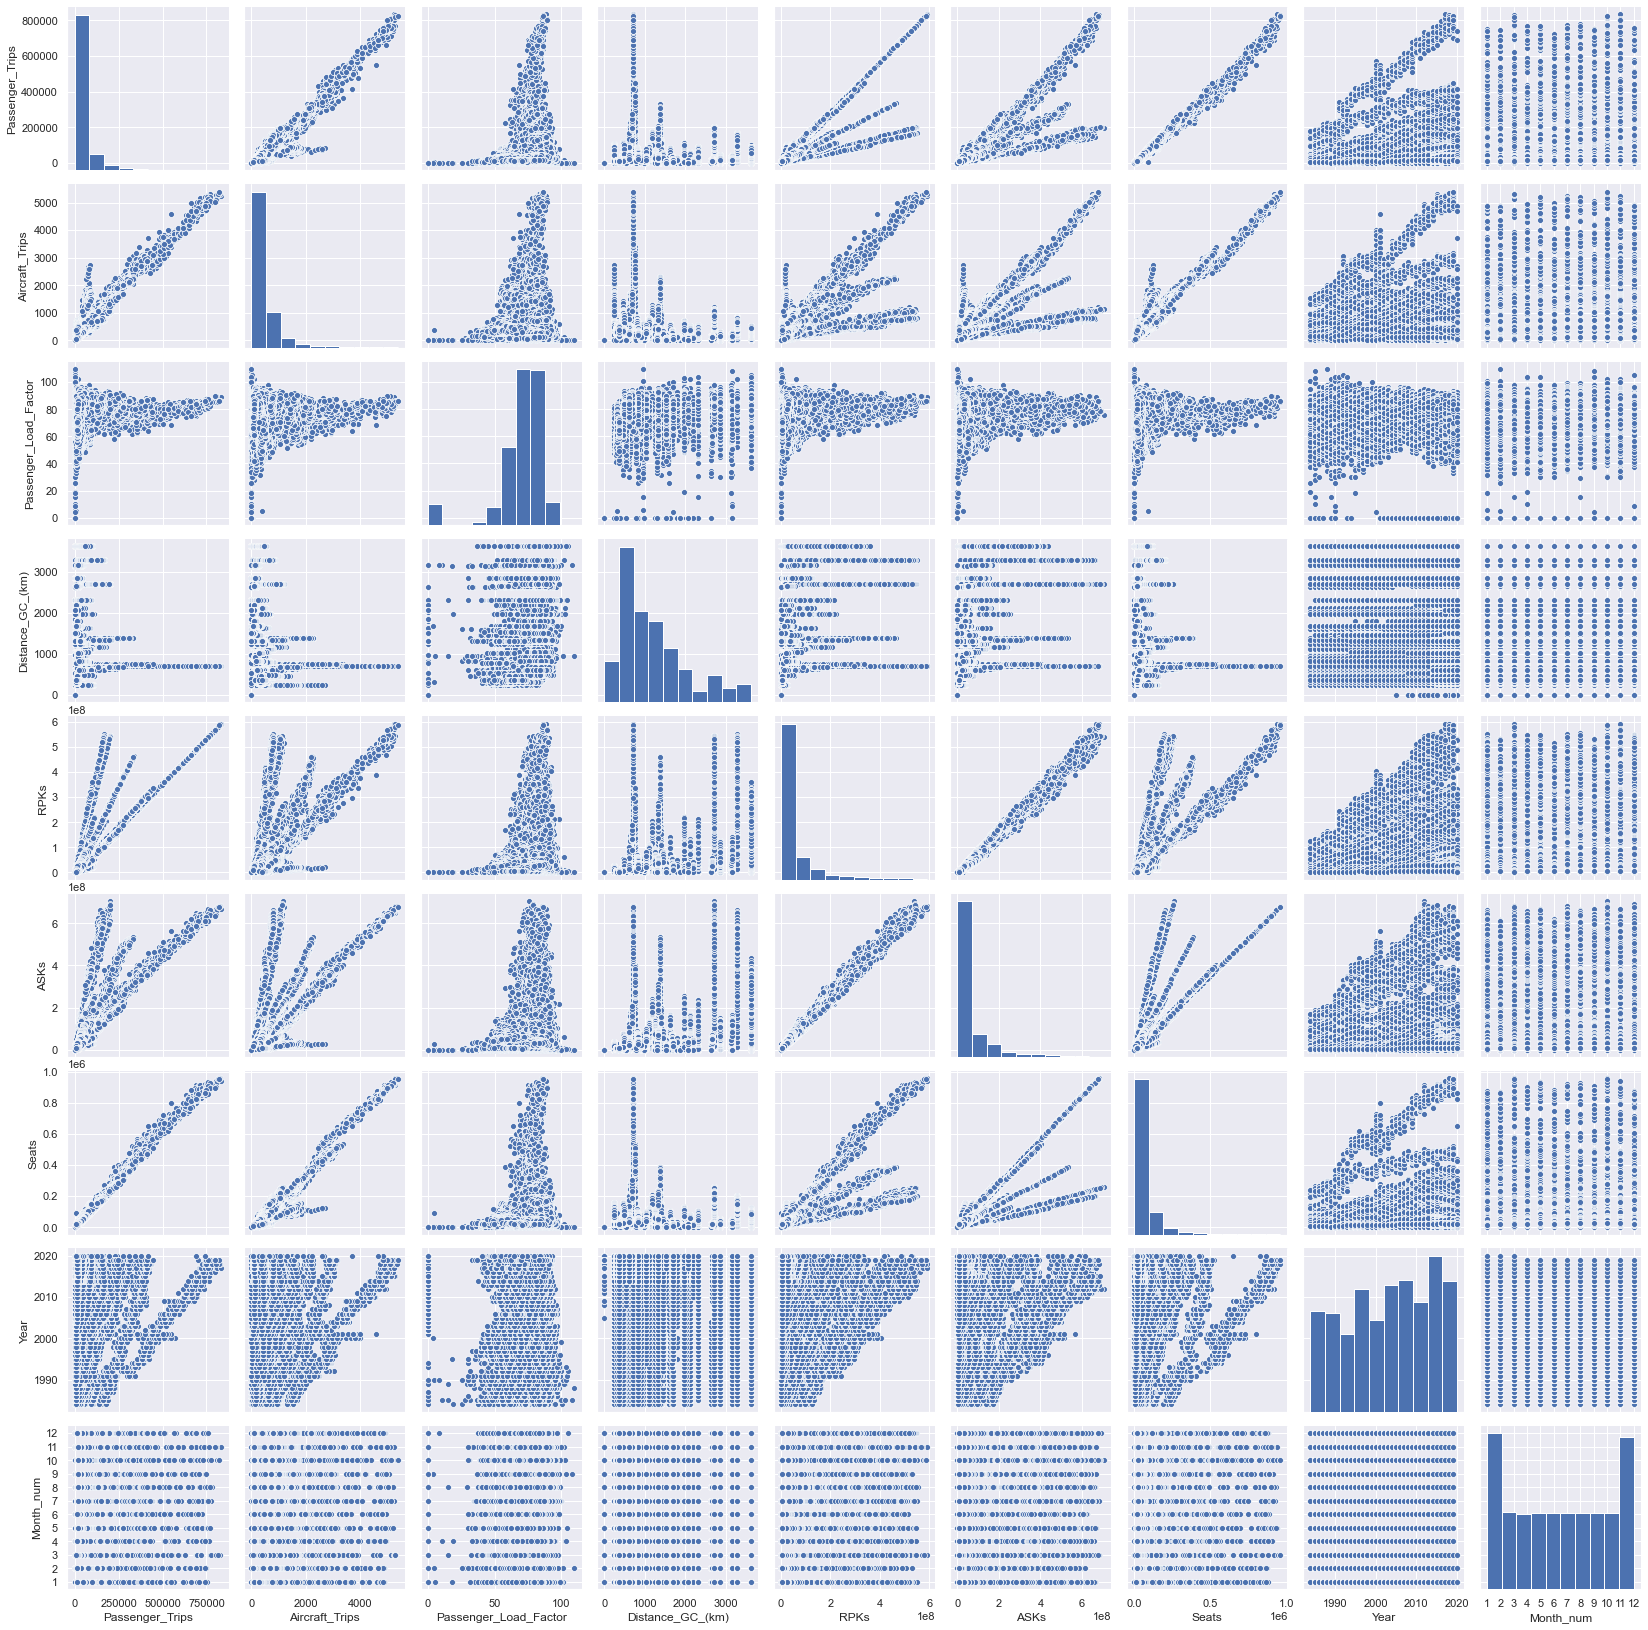

In [129]:
sns.pairplot(airtraffic)

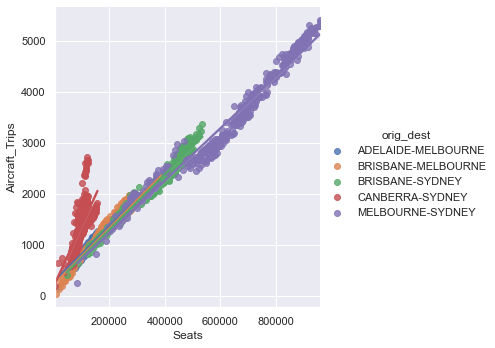

In [198]:
#correlation of seats and aircraft_trips
sns.lmplot(x='Seats',y='Aircraft_Trips', data=tes, fit_reg = True, hue='orig_dest')
#sns.lineplot(x='date',y='Aircraft_Trips', hue='orig_dest', data=tes)

-over the years we can see an upward trend, this year there is not enough data but it looks like that trips has started to fal
-Sunday is the busiest day for passenger trips and October is the busiest month
-melb-syd, brib-syd has been the busiest route throughout the years. last 5 years canberra sydney has shwon a decrease in trips, going  below than adel-melb.